In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
!kaggle datasets download prishasawhney/mushroom-dataset

Dataset URL: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset
License(s): other




  0%|          | 0.00/602k [00:00<?, ?B/s]
100%|██████████| 602k/602k [00:01<00:00, 476kB/s]
100%|██████████| 602k/602k [00:01<00:00, 475kB/s]


In [4]:
with ZipFile("mushroom-dataset.zip", "r") as obj:
    obj.extractall()

In [5]:
data = pd.read_csv("mushroom_cleaned.csv")
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [6]:
for col in data.columns:
    print(col, data[col].isna().sum())

cap-diameter 0
cap-shape 0
gill-attachment 0
gill-color 0
stem-height 0
stem-width 0
stem-color 0
season 0
class 0


### Scaling is not required for tree based algorithms.

In [10]:
x = data.drop(columns='class',axis=1)
y = data['class']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [22]:
scores = []
for i in range(1, 101):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    scores.append(score)
max(scores)
y_pred = rf.predict(x_test)

0.991672064402702

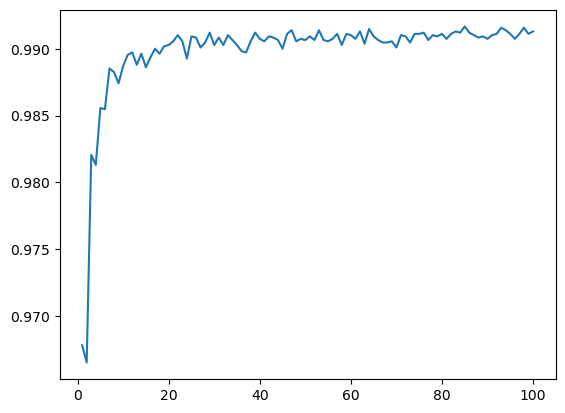

In [26]:
sns.lineplot(x = np.arange(1, 101, 1), y = scores)
plt.savefig("Random Forest")

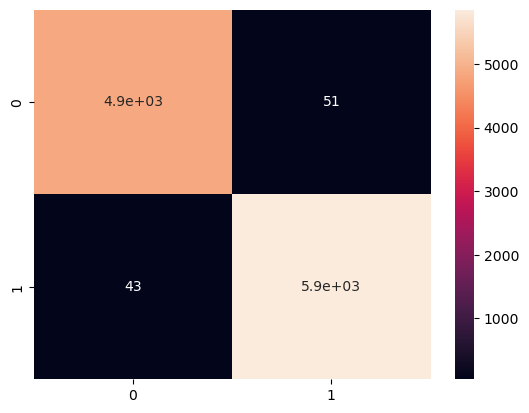

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig("Confusion Matrix for Naive Bayes")
plt.savefig("Confusion Matrix for Random Forest")